# The Gaussian Mixture Class

In this notebook we introduce the `sparseklearn.GaussianMixture` class and demonstrate its basic functionality. `GaussianMixture` is designed to look and feel like scikit-learn's [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) class, but under the hood it uses `sparseklearn.Sparsifier`'s methods to perform computations on sparsified data. It is recommended that you go through the Sparsifier's notebook before this one.

`GaussianMixture` fits a mixture of Gaussians to data using a sparsified analog of the Expectation Maximization algorithm. 

In general, Gaussian mixture models (GMMs) are intractable in high dimensions because training requires iteratively inverting $P \times P$ matrices, where $P=$ `num_feat_full` is the dimension of the original latent space. To circumvent this issue we use only spherical or diagonal covariances. This also helps keep the number of parameters down to $\mathcal{O}(P)$ rather than $\mathcal{O}(P^2)$. 

In [2]:
import numpy as np
from GaussianMixturePy import GaussianMixturePy

## Basic usage

In [3]:
rs = np.random.RandomState(78)
num_samp, num_feat_full = 1000, 100
X = rs.rand(num_samp, num_feat_full)

In [4]:
from sklearn.datasets import make_blobs
X, true_labels = make_blobs(n_samples=1000, centers=4, n_features=100, 
                           random_state=78, cluster_std=5.0)

gmm = GaussianMixturePy(num_samp=num_samp, num_feat_full=num_feat_full, 
                        num_feat_comp=10, n_components=4)
gmm.fit(X)
y_pred = gmm.predict(X=X)

Cluster Label Distribution:
Cluster 0: 259 samples (25.90%)
Cluster 1: 241 samples (24.10%)
Cluster 2: 252 samples (25.20%)
Cluster 3: 248 samples (24.80%)

Model Parameters:
Weights: [0.25777211 0.24369139 0.25046963 0.24806687]
Converged: True
Iterations: 10
Log Likelihood: -31.272642754607084


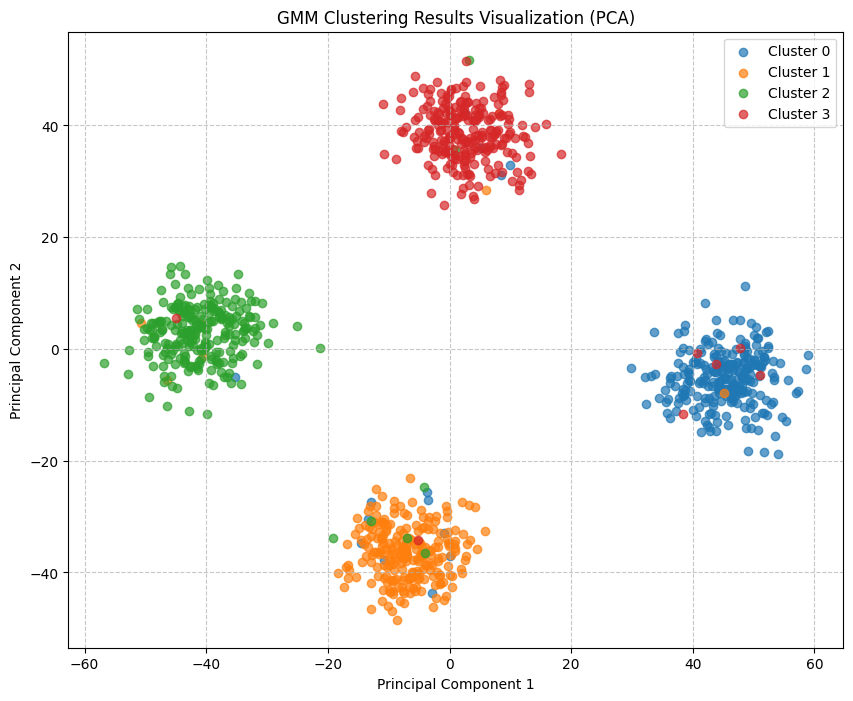


Spherical Covariances:
Cluster 0 covariance: 23.482923
Cluster 1 covariance: 23.628971
Cluster 2 covariance: 23.706242
Cluster 3 covariance: 23.122910

Clustering Evaluation Metrics:
Silhouette Score: 0.2679 (closer to 1 is better)
Calinski-Harabasz Index: 254.9526 (higher is better)


In [5]:
print("Cluster Label Distribution:")
unique_labels, counts = np.unique(y_pred, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples ({count/len(y_pred)*100:.2f}%)")

# Output model parameters
print("\nModel Parameters:")
print(f"Weights: {gmm.weights_}")
print(f"Converged: {gmm.converged}")
print(f"Iterations: {gmm.counter}")
print(f"Log Likelihood: {gmm.log_prob_norm_}")

# Visualize clustering results (using PCA for 2D projection)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot scatter points
plt.figure(figsize=(10, 8))
for i in range(gmm.n_components):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], label=f'Cluster {i}', alpha=0.7)

# Plot cluster centers
means_pca = pca.transform(gmm.means_)


plt.title('GMM Clustering Results Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualize covariances
if gmm.covariance_type == 'spherical':
    print("\nSpherical Covariances:")
    for i in range(gmm.n_components):
        print(f"Cluster {i} covariance: {gmm.covariances_[i]:.6f}")
elif gmm.covariance_type == 'diag':
    print("\nDiagonal Covariances (first 10 features):")
    for i in range(gmm.n_components):
        print(f"Cluster {i} covariances (first 10): {gmm.covariances_[i][:10]}")
        
# Calculate clustering evaluation metrics (if true labels available)
try:
    from sklearn.metrics import silhouette_score, calinski_harabasz_score
    
    # Silhouette score (no true labels needed)
    silhouette = silhouette_score(X, y_pred)
    print(f"\nClustering Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette:.4f} (closer to 1 is better)")
    
    # Calinski-Harabasz index (no true labels needed)
    ch_score = calinski_harabasz_score(X, y_pred)
    print(f"Calinski-Harabasz Index: {ch_score:.4f} (higher is better)")
except:
    print("\nUnable to calculate clustering metrics, please ensure scikit-learn is installed")